Two input files: 

- CDR BED files 

- Centromere annotation files 


We want to get stats on CDRs which is where the centromere annotation track overlaps with the strict CDR bed files

(1) start and end of the total CDR in the array 

(2) the size and spacing of the internal components, or collection of CDRs 


In [21]:
# imports
import os
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
from natsort import index_natsorted, order_by_index
sns.set()  # Don't forget this!
from matplotlib import pyplot

%matplotlib inline

In [22]:
class CDR:
    def __init__(self, numChr, hap, start, end) -> None:
        '''
        Class for each unique overlap (centromere dip region) for each chromosome
        '''
        self.numChr = numChr
        self.hap = hap
        self.start = int(start)  # convert to int, otherwise returns Nonetype error
        self.end = int(end)

In [23]:
# parsing the overlapping regions bedfiles

def bedParse(dir):
    """
    bedParse takes in a file folder of bedfiles outputted from bedtools intersect
    and stores all the information into a list of CDR objects.
    Returns a list of CDR objects. 
    """
    # store all unique overlaps as individual CDR objects
    cdr_list = []
    for root, dirs, files in os.walk(dir): # open folder intersectOutputs
        for filename in files:  # iterate through each file in the folder
            filepath = os.path.join(root, filename)  # file path
            filename_split = filename.split('_')
            if filename != '.DS_Store' and filename[6:10] != 'acro' and filename_split[1][:4] != 'chrM' and filename_split[1][:6] != 'chrEBV':  # dont read in the .DS_store file
                with open(filepath) as f:  # now we are in the file
                    lines = f.readlines()
                    uniques = set()
                    allCDRs = []
                    for line in lines: # for each line of overlaps in the file
                        col = line.split()
                        start, end = col[1], col[2]  # 2nd, 3rd column
                        uniques.add((start,end))
                        allCDRs.append((start, end))
                    # filename_split = filename.split('_')
                    # for tup in uniques:
                    for tup in allCDRs:
                        if filename_split[0][2:].isalpha():  # if the chromosome is X or Y (after chr)
                            cdr = CDR(filename_split[0][2:], filename_split[1], tup[0], tup[1])
                        else:  # if the chromosome is a number then store the chromosome num as an int
                            cdr = CDR(int(filename_split[0][2:]), filename_split[1], tup[0], tup[1])
                        cdr_list.append(cdr)
    return cdr_list

directory = '/Users/emilyxu/Desktop/cdrproject/intersectOutputs'
cdr_list = bedParse(directory)


In [24]:
# For Justin's HMM bedfiles

def bedParse(dir):
    """
    bedParse takes in a file folder of bedfiles outputted from bedtools intersect
    and stores all the information into a list of CDR objects.
    Returns a list of CDR objects. 
    """
    # store all unique overlaps as individual CDR objects
    cdr_list = []
    for root, dirs, files in os.walk(dir): # open folder intersectOutputs
        for filename in files:  # iterate through each file in the folder
            filepath = os.path.join(root, filename)  # file path
            filename_split = filename.split('_')
            if filename != '.DS_Store' and filename[6:10] != 'acro' and filename_split[1][:4] != 'chrM' and filename_split[1][:6] != 'chrEBV':  # dont read in the .DS_store file
                with open(filepath) as f:  # now we are in the file
                    lines = f.readlines()
                    uniques = set()
                    allCDRs = []
                    for line in lines: # for each line of overlaps in the file
                        col = line.split()
                        start, end = col[1], col[2]  # 2nd, 3rd column
                        uniques.add((start,end))
                        allCDRs.append((start, end))
                    # filename_split = filename.split('_')
                    # for tup in uniques:
                    for tup in allCDRs:
                        # print(filename_split[1][3:], filename_split[2][:8])
                        if filename_split[1][3:].isalpha():  # if the chromosome is X or Y (after chr)
                            cdr = CDR(filename_split[1][3:], filename_split[2][:8], tup[0], tup[1])
                        else:  # if the chromosome is a number then store the chromosome num as an int
                            cdr = CDR(int(filename_split[1][3:]), filename_split[2][:8], tup[0], tup[1])
                        cdr_list.append(cdr)
    return cdr_list

directory = '/Users/emilyxu/Desktop/cdrproject/HMMBedData'
hmmList = bedParse(directory)



In [25]:
# strict bedfiles parsing
directory = '/Users/emilyxu/Desktop/cdrproject/CDRStrictBedFiles'

strictBed = []
for root, dirs, files in os.walk(directory): # open folder intersectOutputs
    for filename in files:  # iterate through each file in the folder
        filepath = os.path.join(root, filename)  # file path
        filename_split = filename.split('_')
        if filename != '.DS_Store' and filename[6:10] != 'acro' and filename_split[1][:4] != 'chrM' and filename_split[1][:6] != 'chrEBV':  # dont read in certain files
            with open(filepath) as f:  # now we are in the file
                strictBed.append((filename_split[1][3:], filename_split[2][:8], len(f.readlines())))

strictBedDF = pd.DataFrame(strictBed, columns=['ChrmNum','haplotype', 'length'])  # length = lines in the file (num of hypomethylated regions, not necessarily all CDRs)
strictBedDF['haplotype'] = strictBedDF['haplotype'].str.lower()
strictBedDF = strictBedDF.reindex(index=order_by_index(strictBedDF.index, index_natsorted(strictBedDF['ChrmNum'], reverse=False)))
strictBedDF

,ChrmNum,haplotype,length
11,1,paternal,2863
23,1,maternal,3007
21,2,paternal,2896
32,2,maternal,2940
0,3,paternal,2646
34,3,maternal,2953
4,4,paternal,3367
39,4,maternal,2881
16,5,paternal,2595
28,5,maternal,2712


# Data Exploration

## Over all chromosomes

In [26]:
# 1. (strict BED files) summary of lengths of CDRs across all chromosomes 
#    boxplot or histogram 

# all CDR ranges in one dataframe
# chr#     start       end
# chr6   43824280    49285928
# chr6    3948239    3949240

allDF = pd.DataFrame([(cdr.numChr, (cdr.start, cdr.end), cdr.hap) for cdr in cdr_list], 
                    columns=['ChrmNum','ranges', 'haplotype'])

# sort df by chromosome number
allDF = allDF.reindex(index=order_by_index(allDF.index, index_natsorted(allDF['ChrmNum'], reverse=False)))
allDF['start'], allDF['end'] = allDF.ranges.str
allDF['length'] = allDF['end'] - allDF['start']
# display(df)  # display dataframe in a nice way
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # print entire dataframe out
#     print(df)

# sort uniques
uniques = allDF.groupby('ranges').first().reset_index()
uniques = uniques.reindex(index=order_by_index(uniques.index, index_natsorted(uniques['ChrmNum'], reverse=False)))
uniques = uniques[['ChrmNum', 'ranges', 'haplotype', 'start', 'end', 'length']]

uniques


/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,ChrmNum,ranges,haplotype,start,end,length
1420,1,"(122587375, 122609375)",maternal,122587375,122609375,22000
1421,1,"(122610375, 122652375)",maternal,122610375,122652375,42000
1422,1,"(122670375, 122687375)",maternal,122670375,122687375,17000
1423,1,"(122778375, 122788375)",maternal,122778375,122788375,10000
1424,1,"(122830375, 122838375)",maternal,122830375,122838375,8000
...,...,...,...,...,...,...
467,Y,"(18583688, 18589688)",paternal,18583688,18589688,6000
473,Y,"(19126688, 19129688)",paternal,19126688,19129688,3000
474,Y,"(19130688, 19133688)",paternal,19130688,19133688,3000
475,Y,"(19138688, 19141688)",paternal,19138688,19141688,3000


In [27]:
# HMM dataframe

allHMM = pd.DataFrame([(cdr.numChr, (cdr.start, cdr.end), cdr.hap) for cdr in hmmList], 
                    columns=['ChrmNum','ranges', 'haplotype'])

# sort df by chromosome number
allHMM = allHMM.reindex(index=order_by_index(allHMM.index, index_natsorted(allHMM['ChrmNum'], reverse=False)))
allHMM['start'], allHMM['end'] = allHMM.ranges.str
allHMM['length'] = allHMM['end'] - allHMM['start']
# display(df)  # display dataframe in a nice way
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # print entire dataframe out
#     print(df)

# sort uniques
uniqueHMM = allHMM.groupby('ranges').first().reset_index()
uniqueHMM = uniqueHMM.reindex(index=order_by_index(uniqueHMM.index, index_natsorted(uniqueHMM['ChrmNum'], reverse=False)))
uniqueHMM = uniqueHMM[['ChrmNum', 'ranges', 'haplotype', 'start', 'end', 'length']]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # print entire dataframe out
#     print(allDF)

display(uniqueHMM)

/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,ChrmNum,ranges,haplotype,start,end,length
623,1,"(122588553, 122607144)",MATERNAL,122588553,122607144,18591
624,1,"(122608264, 122609774)",MATERNAL,122608264,122609774,1510
625,1,"(122610340, 122652509)",MATERNAL,122610340,122652509,42169
626,1,"(122670602, 122671622)",MATERNAL,122670602,122671622,1020
627,1,"(122674913, 122686663)",MATERNAL,122674913,122686663,11750
...,...,...,...,...,...,...
158,Y,"(10626325, 10670407)",PATERNAL,10626325,10670407,44082
159,Y,"(10688835, 10690137)",PATERNAL,10688835,10690137,1302
160,Y,"(10724670, 10732249)",PATERNAL,10724670,10732249,7579
161,Y,"(10736240, 10772184)",PATERNAL,10736240,10772184,35944


In [28]:
# statistical questions: 
# 1. How many times does each duplicate occur?
# Format:
#                                   numOcc
# Chr 1: (124421626, 124444626):     16

counts = allDF.groupby(allDF.columns.tolist(),as_index=False).size()
counts = counts.reindex(index=order_by_index(counts.index, index_natsorted(counts['size'], reverse=True)))
counts['overlap occurrences'] = counts['size']
display(counts[['ChrmNum', 'ranges','haplotype','overlap occurrences']])


,ChrmNum,ranges,haplotype,overlap occurrences
912,14,"(9435563, 9518563)",paternal,488
1077,16,"(34946013, 35013013)",paternal,396
363,8,"(45229663, 45296663)",paternal,395
501,10,"(42220261, 42282261)",maternal,366
1185,19,"(29245220, 29304220)",paternal,348
...,...,...,...,...
888,14,"(8012563, 8016563)",paternal,1
1007,15,"(9704634, 9707634)",maternal,1
1192,19,"(29657106, 29660106)",maternal,1
1216,20,"(9176554, 9182554)",paternal,1


In [29]:
# 2. What is the percentage of overlaps vs non overlaps? 
# --> compare strict bedfiles with intersect bedfiles (uniques)

total = counts.groupby(['ChrmNum', 'haplotype'])['overlap occurrences'].sum()
total = total.reset_index()
total['Chrm'] = total['ChrmNum'].astype(str) + '_' + total['haplotype']

strictBedDF = strictBedDF.reset_index(drop=True)
strictBedDF['Chrm'] = strictBedDF['ChrmNum'].astype(str) + '_' + strictBedDF['haplotype']

merged = strictBedDF.merge(total, how='outer', on='Chrm')
merged[['Chrm', 'length', 'overlap occurrences']]
merged['percent of overlaps'] = (merged['overlap occurrences'] / merged['length']) * 100
merged['percent of non-overlaps'] = ((merged['length'] - merged['overlap occurrences']) / merged['length']) * 100
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # print entire dataframe out
#     print(merged)
display(merged)

,ChrmNum_x,haplotype_x,length,Chrm,ChrmNum_y,haplotype_y,overlap occurrences,percent of overlaps,percent of non-overlaps
0,1,paternal,2863,1_paternal,1,paternal,749,26.161369,73.838631
1,1,maternal,3007,1_maternal,1,maternal,604,20.086465,79.913535
2,2,paternal,2896,2_paternal,2,paternal,682,23.549724,76.450276
3,2,maternal,2940,2_maternal,2,maternal,666,22.653061,77.346939
4,3,paternal,2646,3_paternal,3,paternal,474,17.913832,82.086168
5,3,maternal,2953,3_maternal,3,maternal,594,20.115137,79.884863
6,4,paternal,3367,4_paternal,4,paternal,538,15.978616,84.021384
7,4,maternal,2881,4_maternal,4,maternal,449,15.584866,84.415134
8,5,paternal,2595,5_paternal,5,paternal,986,37.996146,62.003854
9,5,maternal,2712,5_maternal,5,maternal,839,30.936578,69.063422


/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Frequency')

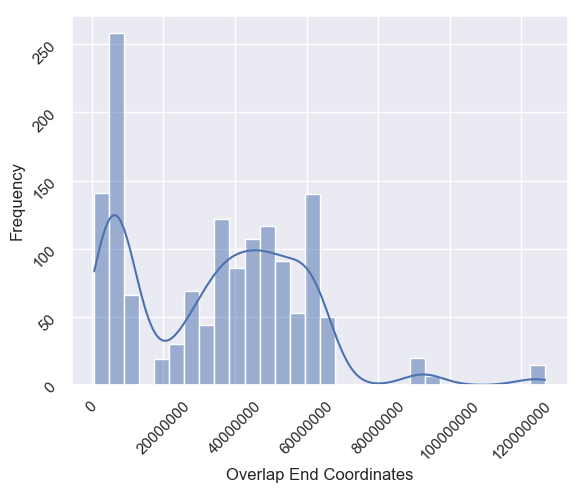

In [30]:
# position of CDR regions

plot = sns.histplot(data=uniques.start, bins=30, kde=True) # plot histogram
plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
plot.tick_params(labelrotation=45)  # rotate x ticks
plot.set_xlabel('Overlap End Coordinates')
plot.set_ylabel('Frequency')


/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/cse160/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(0, 40000)

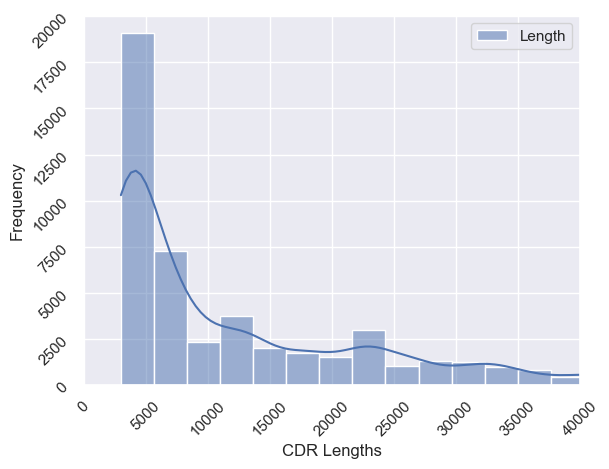

In [31]:
# length of CDR regions
df = pd.DataFrame([(cdr.numChr, cdr.start, cdr.end, cdr.hap) for cdr in cdr_list], 
                    columns=['ChrmNum','start', 'end', 'haplotype'])
lengthDf = pd.DataFrame(df.end-df.start, columns=['Length'])

# plot length graph
plot = sns.histplot(data=lengthDf, bins=30, kde=True) # plot histogram
plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
plot.tick_params(labelrotation=45)  # rotate x ticks
plot.set_xlabel('CDR Lengths')
plot.set_ylabel('Frequency')
plot.set_xlim(0,40000)

## Exploring each individual chromosome's CDRs

In [32]:
# maternal chromosomes 1-22
chrmNum_hap = df.loc[(df['ChrmNum'] == '6') & (df['haplotype'] == 'maternal')]

# plot = sns.histplot(data=chrmNum_hap.end, bins=30, kde=True) # plot histogram
# plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
# plot.tick_params(labelrotation=45)  # rotate x ticks
# plot.set_xlabel('Overlap End Coordinates')
# plot.set_ylabel('Frequency')

# plot = sns.histplot(chrmNum_hap.start, kde=True, color='blue')
# plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
# plot.tick_params(labelrotation=45)  # rotate x ticks

# maternal chromosomes 1-22
# for chr in range(1,23):
#     chrmNum_hap = df.loc[(df['ChrmNum'] == chr) & (df['haplotype'] == 'maternal')]
#     pyplot.figure()
#     plot = sns.histplot(chrmNum_hap.start, kde=True, color='blue')
#     plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
#     plot.tick_params(labelrotation=45)  # rotate x ticks
#     plot.set_title('Chr'+str(chr) + ' Maternal')



In [33]:
# paternal chromosomes 1-22
# for chr in range(1,23):
#     chrmNum_hap = df.loc[(df['ChrmNum'] == chr) & (df['haplotype'] == 'paternal')]
#     pyplot.figure()
#     plot = sns.histplot(chrmNum_hap.start, kde=True, color='blue')
#     plot.ticklabel_format(style='plain', axis='x',useOffset=False)  # get rid of scientific notation values
#     plot.tick_params(labelrotation=45)  # rotate x ticks
#     plot.set_title('Chr'+str(chr) + ' Paternal')

In [34]:
# Density plot
df = pd.DataFrame([(cdr.numChr, cdr.start, cdr.end, cdr.hap) for cdr in cdr_list], 
                    columns=['ChrmNum','start', 'end', 'haplotype'])

from natsort import index_natsorted, order_by_index

df = df.reindex(index=order_by_index(df.index, index_natsorted(df['ChrmNum'], reverse=False)))
# df.sort_values('ChrmNum')
# print(df.to_string())

rangesDF = pd.DataFrame([(cdr.numChr, (int(cdr.start), int(cdr.end)), cdr.hap) for cdr in cdr_list],
                          columns=['ChrmNum','Coordinates', 'haplotype'])

# test different colors
# start coordinates
# pyplot.figure()
# sns.kdeplot(
#    data=df, x="start", hue="ChrmNum",
#    fill=True, common_norm=False, palette="crest",
#    alpha=0.5, linewidth=1,
# )

# # end coordinates
# pyplot.figure()
# sns.kdeplot(
#    data=df, x="end", hue="ChrmNum",
#    fill=True, common_norm=False, palette="crest",
#    alpha=0.5, linewidth=1,
# )


      ChrmNum                  ranges haplotype      start        end  length
42480       1  (122587375, 122609375)  maternal  122587375  122609375   22000
42481       1  (122587375, 122609375)  maternal  122587375  122609375   22000
42482       1  (122587375, 122609375)  maternal  122587375  122609375   22000
42483       1  (122587375, 122609375)  maternal  122587375  122609375   22000
42484       1  (122587375, 122609375)  maternal  122587375  122609375   22000
...       ...                     ...       ...        ...        ...     ...
13411       X    (61295698, 61301698)  maternal   61295698   61301698    6000
13412       X    (61295698, 61301698)  maternal   61295698   61301698    6000
13413       X    (61295698, 61301698)  maternal   61295698   61301698    6000
13414       X    (61295698, 61301698)  maternal   61295698   61301698    6000
13415       X    (61295698, 61301698)  maternal   61295698   61301698    6000

[23816 rows x 6 columns]


Text(0.5, 0.93, 'Boxplots of Strict Bed CDR Locations')

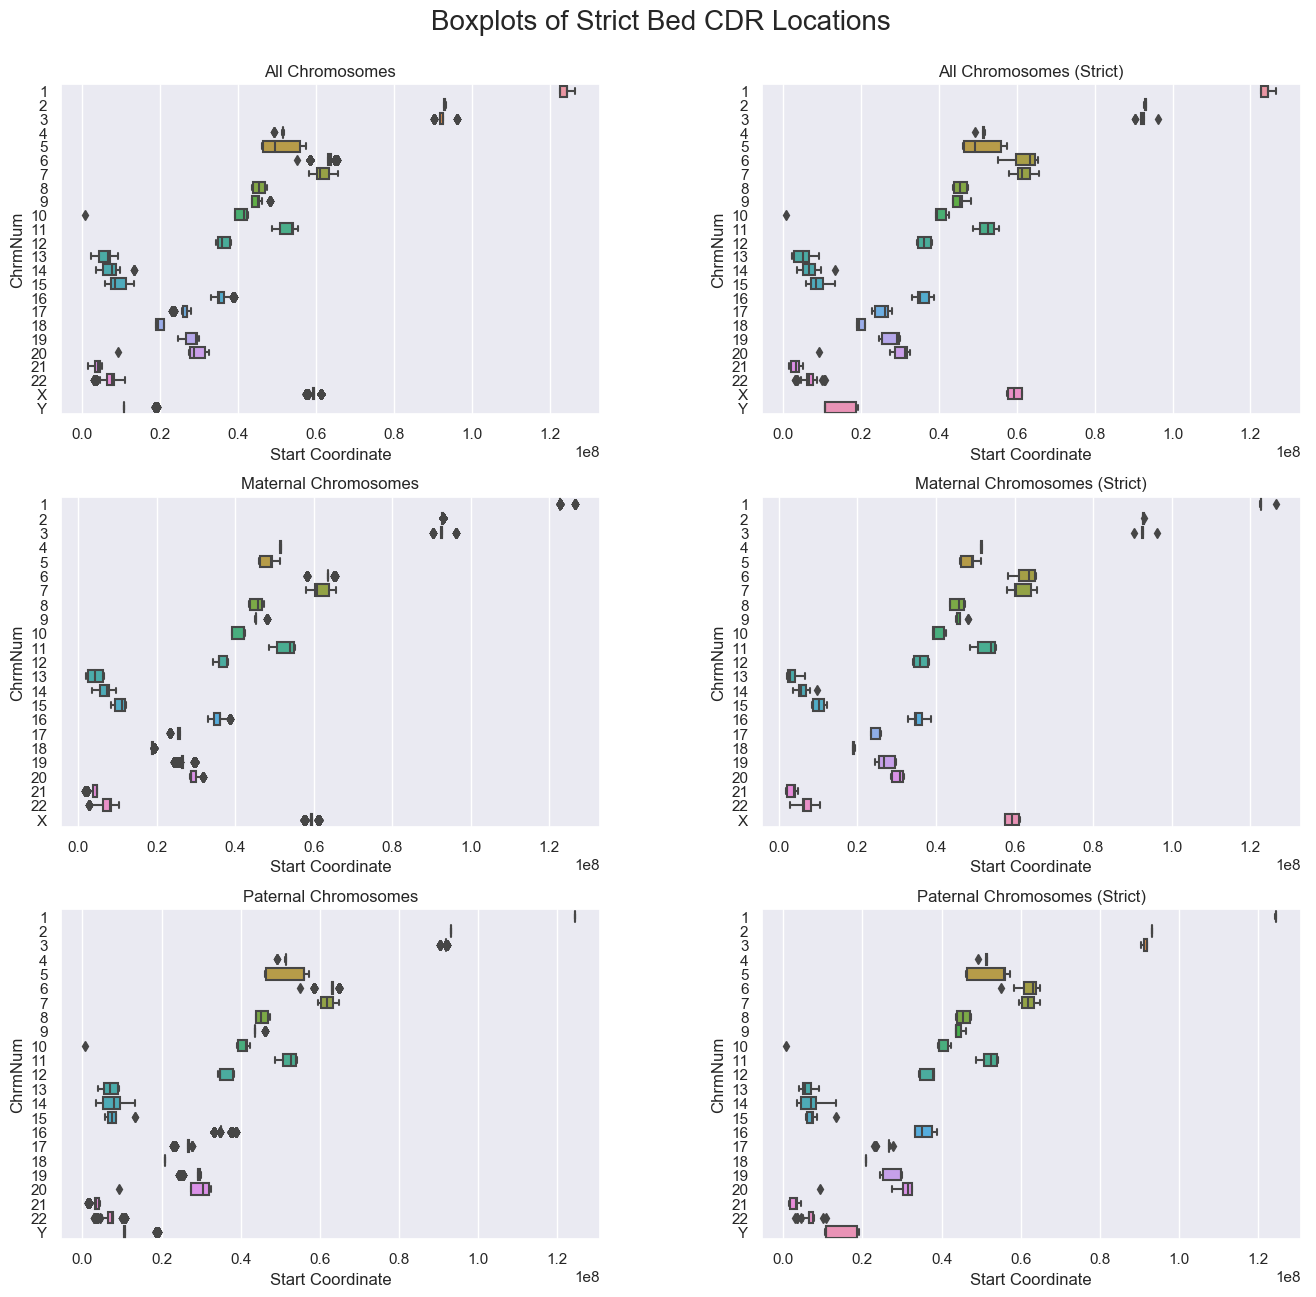

In [35]:
# boxplot of CDR locations
# chrmNum_hap = df.loc[(df['ChrmNum'] == chr) & (df['haplotype'] == 'paternal')]

# df_maternal = df.loc[df['haplotype'] == 'maternal']

fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.boxplot(ax=axes[0,0],y=allDF["ChrmNum"], x=allDF["start"]).set_title('All Chromosomes')
axes[0,0].set(xlabel='Start Coordinate')
# axes[0,0].ticklabel_format(style='plain', axis='x',useOffset=False)
# axes[0,0].tick_params(labelrotation=45)

df_maternal = allDF.loc[allDF['haplotype'] == 'maternal']
print(df_maternal)
sns.boxplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["start"]).set_title('Maternal Chromosomes')
axes[1,0].set(xlabel='Start Coordinate')


df_paternal = allDF.loc[allDF['haplotype'] == 'paternal']
sns.boxplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["start"]).set_title('Paternal Chromosomes')
axes[2,0].set(xlabel='Start Coordinate')

sns.boxplot(ax=axes[0,1],y=uniques["ChrmNum"], x=uniques["start"]).set_title('All Chromosomes (Strict)')
axes[0,1].set(xlabel='Start Coordinate')

df_maternal = uniques.loc[uniques['haplotype'] == 'maternal']
sns.boxplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["start"]).set_title('Maternal Chromosomes (Strict)')
axes[1,1].set(xlabel='Start Coordinate')

df_paternal = uniques.loc[uniques['haplotype'] == 'paternal']
sns.boxplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["start"]).set_title('Paternal Chromosomes (Strict)')
axes[2,1].set(xlabel='Start Coordinate')

pyplot.subplots_adjust(wspace=0.3, hspace=0.25)
fig.suptitle('Boxplots of Strict Bed CDR Locations', fontsize=20, y=0.93)

    ChrmNum                  ranges haplotype      start        end  length
152       1  (122588553, 122607144)  MATERNAL  122588553  122607144   18591
153       1  (122608264, 122609774)  MATERNAL  122608264  122609774    1510
154       1  (122610340, 122652509)  MATERNAL  122610340  122652509   42169
155       1  (122670602, 122671622)  MATERNAL  122670602  122671622    1020
156       1  (122674913, 122686663)  MATERNAL  122674913  122686663   11750
..      ...                     ...       ...        ...        ...     ...
507       X    (59515374, 59517065)  MATERNAL   59515374   59517065    1691
508       X    (61168247, 61173446)  MATERNAL   61168247   61173446    5199
509       X    (61265884, 61268774)  MATERNAL   61265884   61268774    2890
510       X    (61275238, 61279900)  MATERNAL   61275238   61279900    4662
511       X    (61296286, 61303543)  MATERNAL   61296286   61303543    7257

[296 rows x 6 columns]


Text(0.5, 0.93, 'Boxplots of HMM Bed CDR Locations')

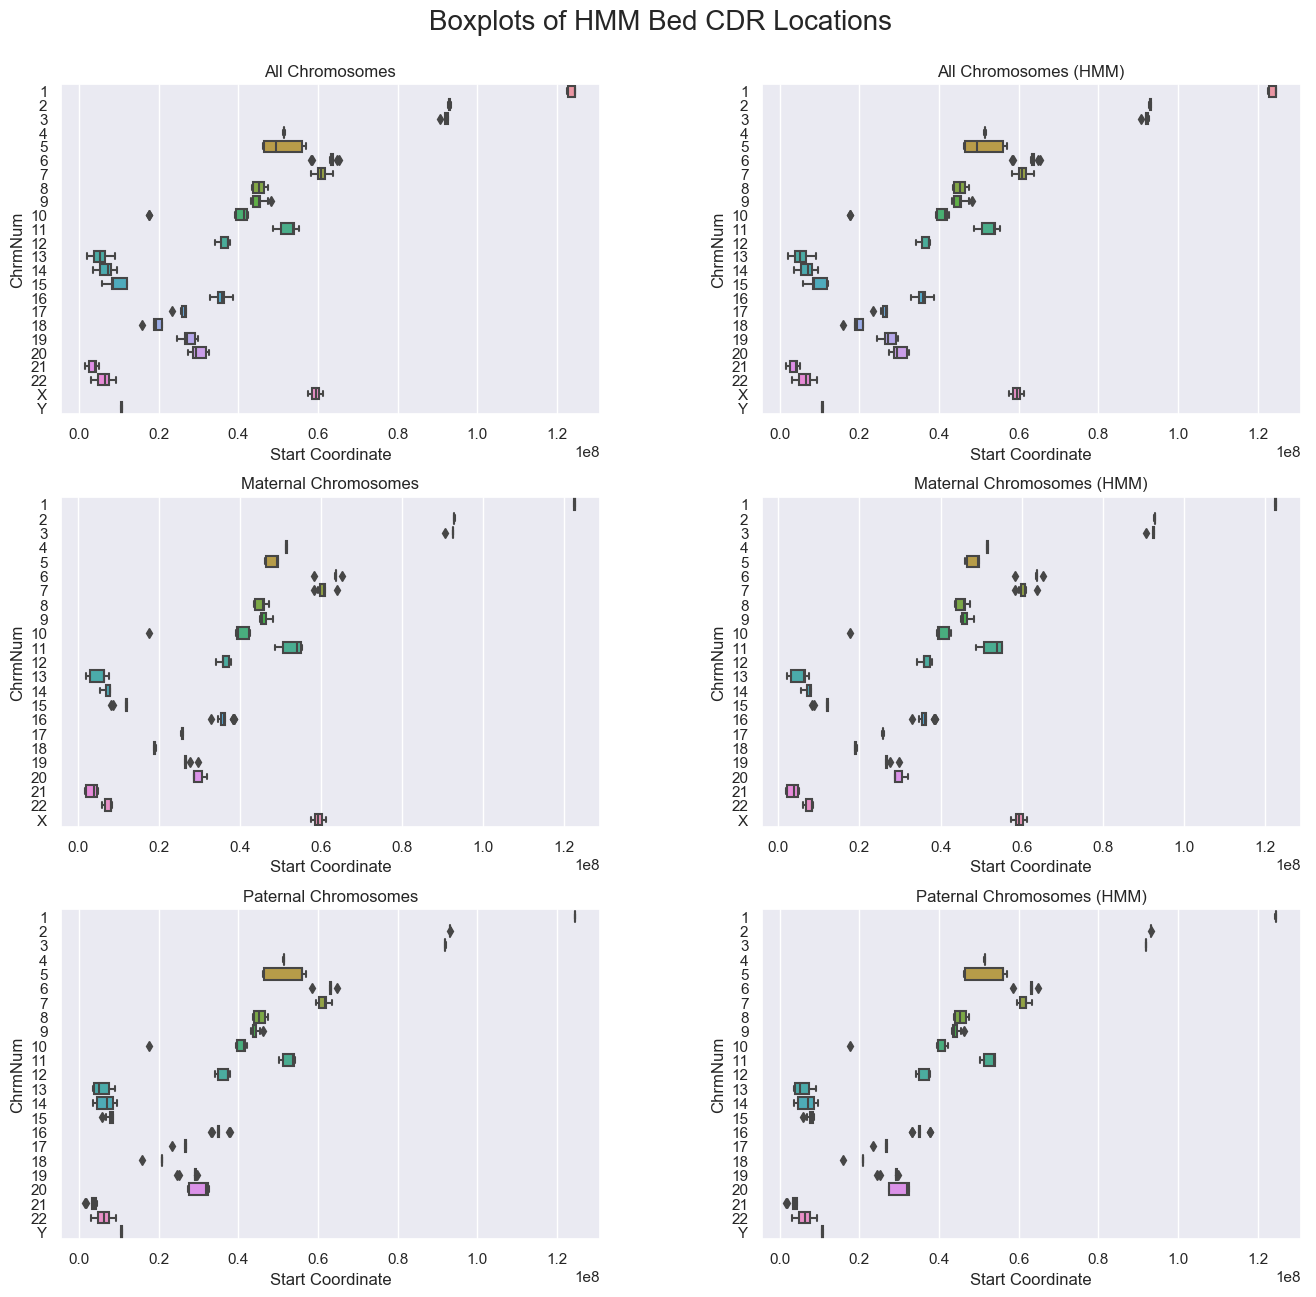

In [36]:
# HMM location boxplots

fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.boxplot(ax=axes[0,0],y=allHMM["ChrmNum"], x=allHMM["start"]).set_title('All Chromosomes')
# axes[0,0].ticklabel_format(style='plain', axis='x',useOffset=False)
# axes[0,0].tick_params(labelrotation=45)

df_maternal = allHMM.loc[allHMM['haplotype'] == 'MATERNAL']
print(df_maternal)
sns.boxplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["start"]).set_title('Maternal Chromosomes')

df_paternal = allHMM.loc[allHMM['haplotype'] == 'PATERNAL']
sns.boxplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["start"]).set_title('Paternal Chromosomes')

sns.boxplot(ax=axes[0,1],y=uniqueHMM["ChrmNum"], x=uniqueHMM["start"]).set_title('All Chromosomes (HMM)')

df_maternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'MATERNAL']
sns.boxplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["start"]).set_title('Maternal Chromosomes (HMM)')

df_paternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'PATERNAL']
sns.boxplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["start"]).set_title('Paternal Chromosomes (HMM)')

for i in range(3):
    for j in range(2):
        axes[i,j].set(xlabel='Start Coordinate')

pyplot.subplots_adjust(wspace=0.3, hspace=0.25)
fig.suptitle('Boxplots of HMM Bed CDR Locations', fontsize=20, y=0.93)

Text(0.5, 0.93, 'Boxplots of Strict Bed CDR lengths')

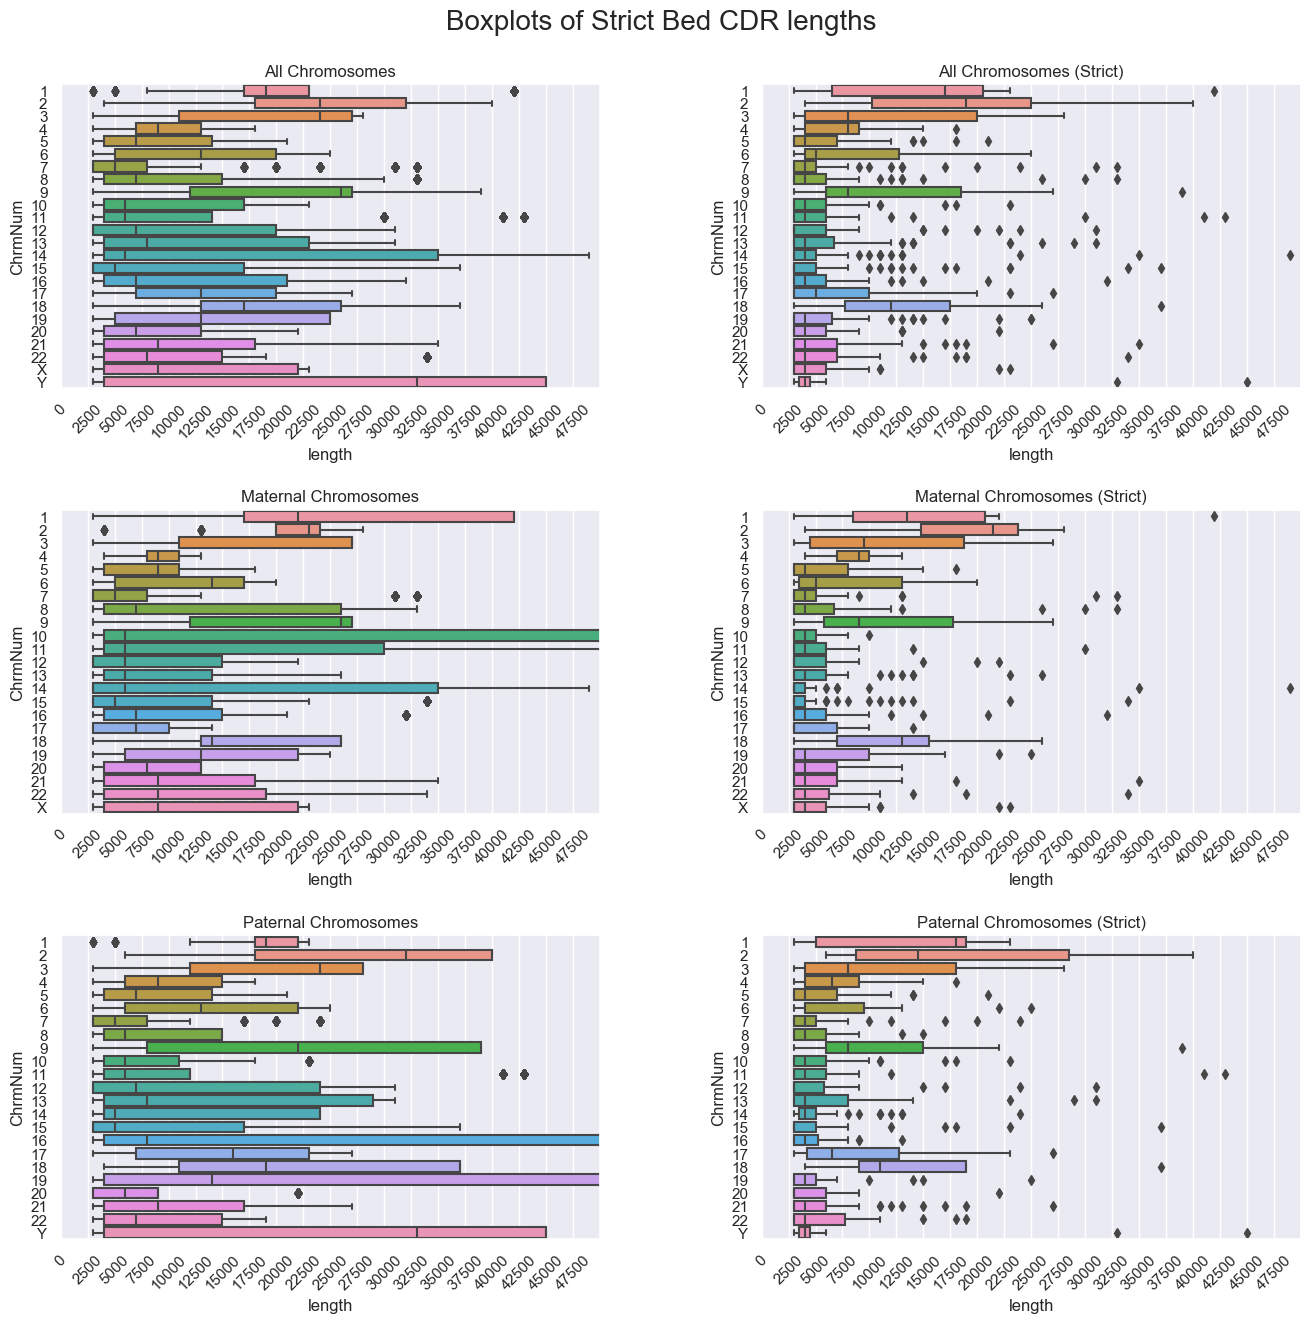

In [37]:
# boxplot of CDR lengths
fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.boxplot(ax=axes[0,0],y=allDF["ChrmNum"], x=allDF["length"]).set_title('All Chromosomes')

df_maternal = allDF.loc[allDF['haplotype'] == 'maternal']
sns.boxplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["length"]).set_title('Maternal Chromosomes')

df_paternal = allDF.loc[allDF['haplotype'] == 'paternal']
sns.boxplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["length"]).set_title('Paternal Chromosomes')

sns.boxplot(ax=axes[0,1],y=uniques["ChrmNum"], x=uniques["length"]).set_title('All Chromosomes (Strict)')

df_maternal = uniques.loc[uniques['haplotype'] == 'maternal']
sns.boxplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["length"]).set_title('Maternal Chromosomes (Strict)')

df_paternal = uniques.loc[uniques['haplotype'] == 'paternal']
sns.boxplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["length"]).set_title('Paternal Chromosomes (Strict)')

for i in range(3):
    for j in range(2):
        axes[i,j].set_xlim(0, 50000)
        axes[i,j].set_xticks(np.arange(0, 50000, 2500))
        axes[i,j].set_xticklabels(axes[i,j].get_xticks(), rotation=45)

pyplot.subplots_adjust(wspace=0.3, hspace=0.4)
fig.suptitle('Boxplots of Strict Bed CDR lengths', fontsize=20, y=0.93)

Text(0.5, 0.93, 'Boxplots of HMM Bed CDR lengths')

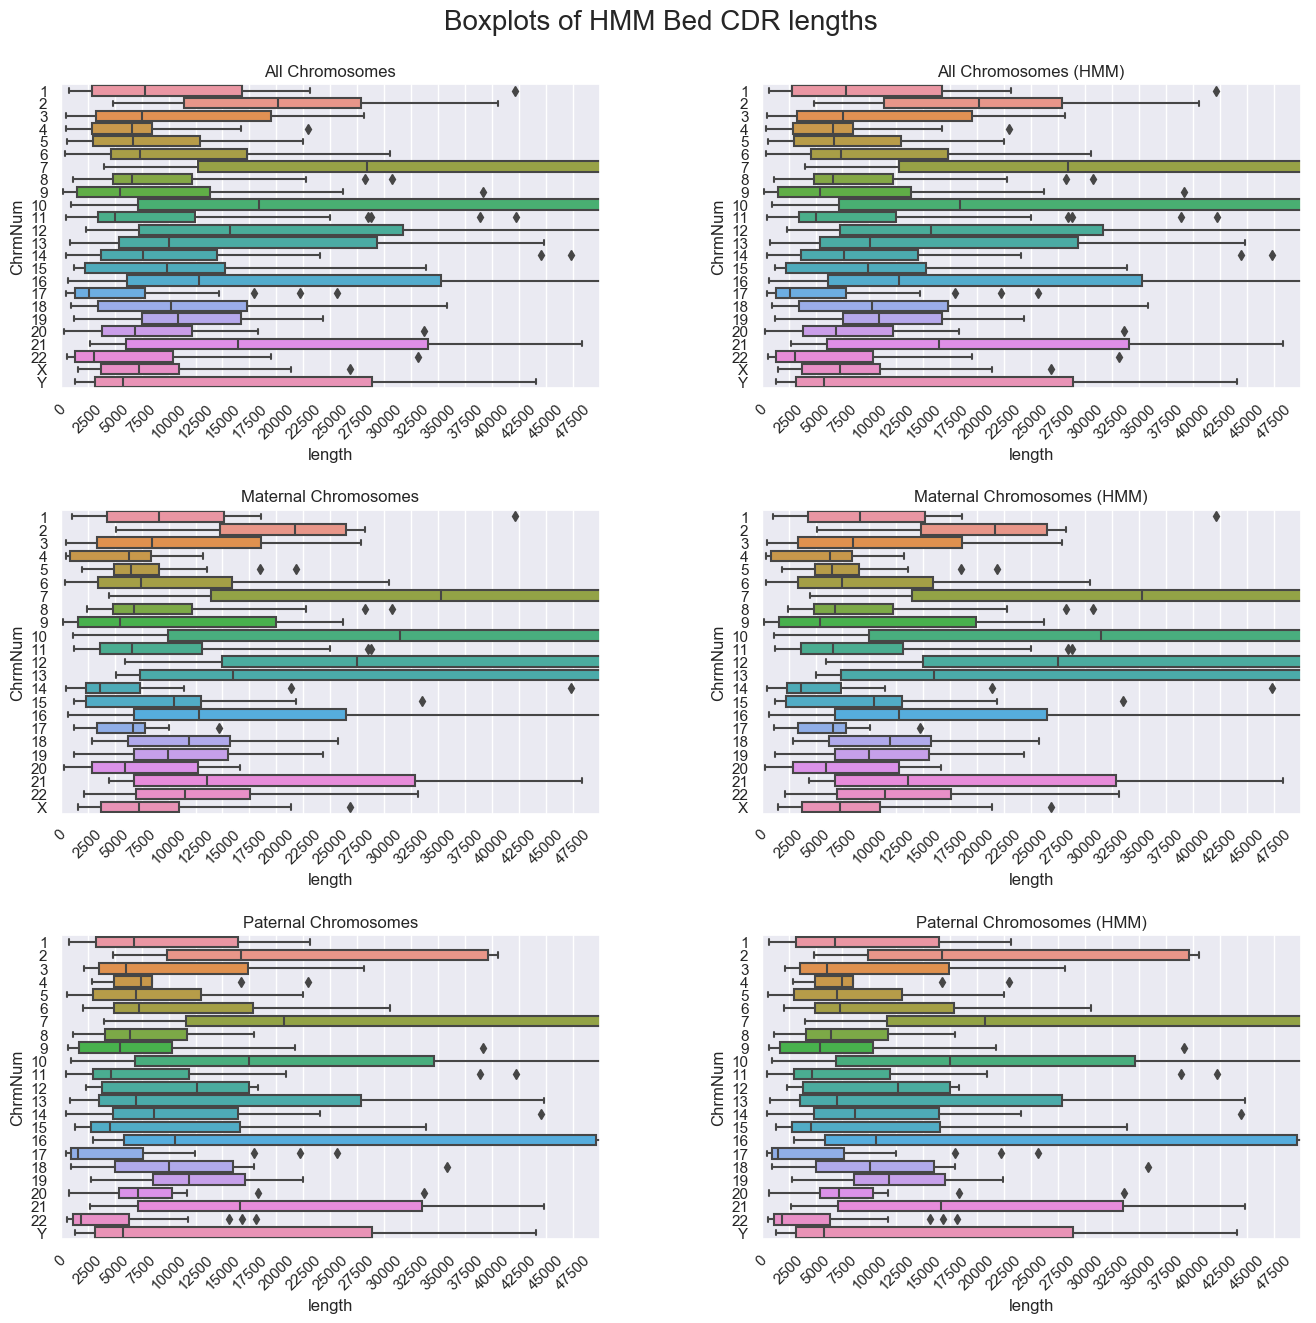

In [38]:
# boxplot of HMM CDR lengths
fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.boxplot(ax=axes[0,0],y=allHMM["ChrmNum"], x=allHMM["length"]).set_title('All Chromosomes')

df_maternal = allHMM.loc[allHMM['haplotype'] == 'MATERNAL']
sns.boxplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["length"]).set_title('Maternal Chromosomes')

df_paternal = allHMM.loc[allHMM['haplotype'] == 'PATERNAL']
sns.boxplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["length"]).set_title('Paternal Chromosomes')

sns.boxplot(ax=axes[0,1],y=uniqueHMM["ChrmNum"], x=uniqueHMM["length"]).set_title('All Chromosomes (HMM)')

df_maternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'MATERNAL']
sns.boxplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["length"]).set_title('Maternal Chromosomes (HMM)')

df_paternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'PATERNAL']
sns.boxplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["length"]).set_title('Paternal Chromosomes (HMM)')

for i in range(3):
    for j in range(2):
        axes[i,j].set_xlim(0, 50000)
        axes[i,j].set_xticks(np.arange(0, 50000, 2500))
        axes[i,j].set_xticklabels(axes[i,j].get_xticks(), rotation=45)

pyplot.subplots_adjust(wspace=0.3, hspace=0.4)
fig.suptitle('Boxplots of HMM Bed CDR lengths', fontsize=20, y=0.93)

Text(0.5, 0.93, 'Dotplots of HMM Bed CDR lengths')

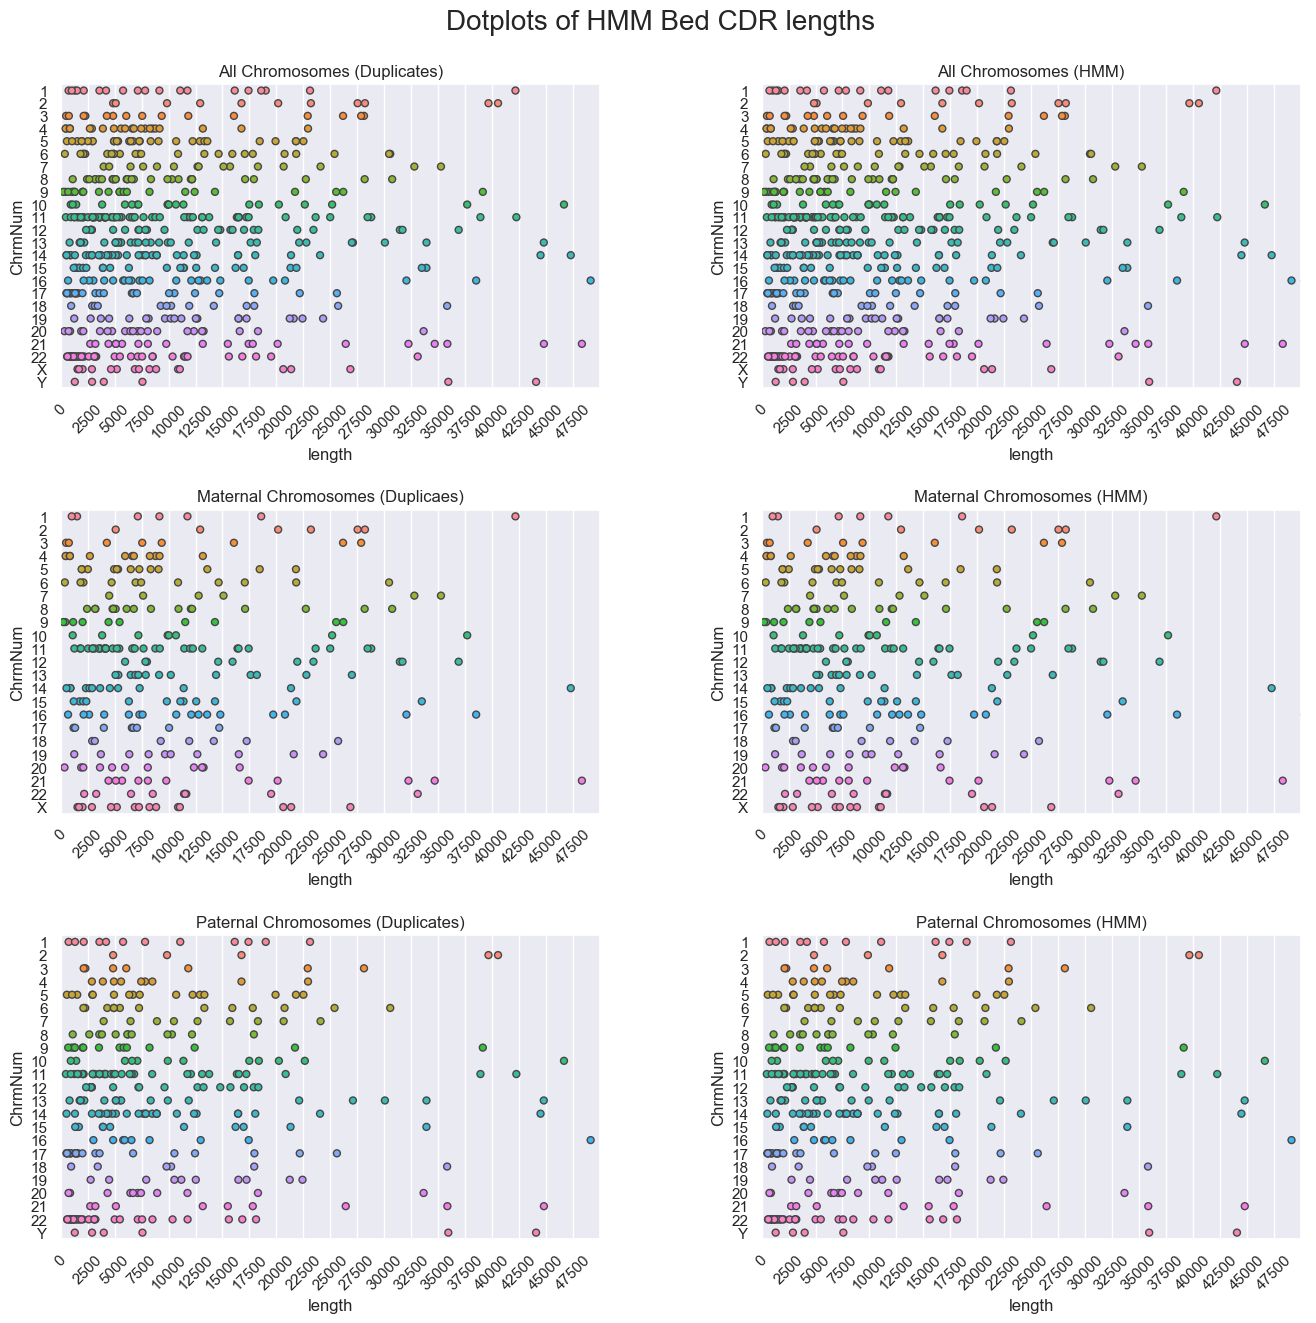

In [39]:
# dotplot of HMM CDR lengths
fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.stripplot(ax=axes[0,0],y=allHMM["ChrmNum"], x=allHMM["length"], jitter=False, linewidth=1).set_title('All Chromosomes (Duplicates)')

df_maternal = allHMM.loc[allHMM['haplotype'] == 'MATERNAL']
sns.stripplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["length"], jitter=False, linewidth=1).set_title('Maternal Chromosomes (Duplicaes)')

df_paternal = allHMM.loc[allHMM['haplotype'] == 'PATERNAL']
sns.stripplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["length"], jitter=False, linewidth=1).set_title('Paternal Chromosomes (Duplicates)')

sns.stripplot(ax=axes[0,1],y=uniqueHMM["ChrmNum"], x=uniqueHMM["length"], jitter=False, linewidth=1).set_title('All Chromosomes (HMM)')

df_maternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'MATERNAL']
sns.stripplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["length"], jitter=False, linewidth=1).set_title('Maternal Chromosomes (HMM)')

df_paternal = uniqueHMM.loc[uniqueHMM['haplotype'] == 'PATERNAL']
sns.stripplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["length"], jitter=False, linewidth=1).set_title('Paternal Chromosomes (HMM)')

for i in range(3):
    for j in range(2):
        axes[i,j].set_xlim(0, 50000)
        axes[i,j].set_xticks(np.arange(0, 50000, 2500))
        axes[i,j].set_xticklabels(axes[i,j].get_xticks(), rotation=45)

pyplot.subplots_adjust(wspace=0.3, hspace=0.4)
fig.suptitle('Dotplots of HMM Bed CDR lengths', fontsize=20, y=0.93)

Text(0.5, 0.93, 'Dotplots of Strict Bed CDR lengths')

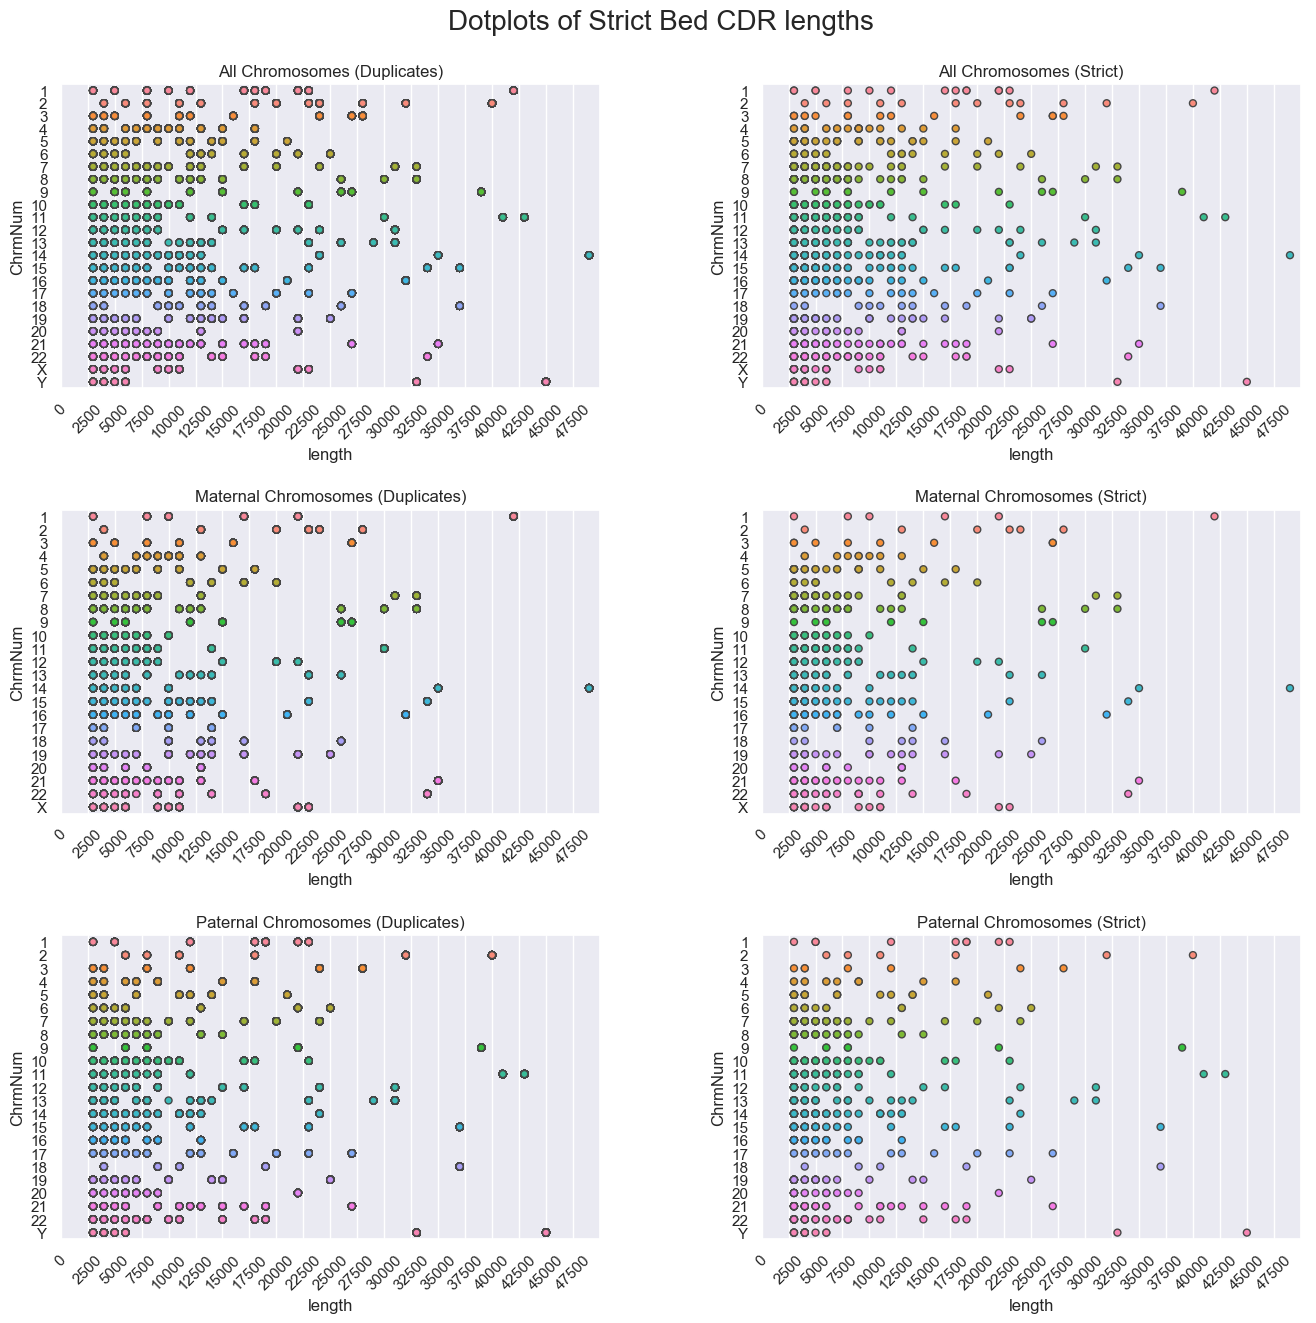

In [40]:
# dotplot of strict bed CDR lengths

fig, axes = pyplot.subplots(3,2, figsize=(16,15))

sns.stripplot(ax=axes[0,0],y=allDF["ChrmNum"], x=allDF["length"], jitter=False, linewidth=1).set_title('All Chromosomes (Duplicates)')

df_maternal = allDF.loc[allDF['haplotype'] == 'maternal']
sns.stripplot(ax=axes[1,0], y=df_maternal["ChrmNum"], x=df_maternal["length"], jitter=False, linewidth=1).set_title('Maternal Chromosomes (Duplicates)')

df_paternal = allDF.loc[allDF['haplotype'] == 'paternal']
sns.stripplot(ax=axes[2,0],y=df_paternal["ChrmNum"], x=df_paternal["length"], jitter=False, linewidth=1).set_title('Paternal Chromosomes (Duplicates)')

sns.stripplot(ax=axes[0,1],y=uniques["ChrmNum"], x=uniques["length"], jitter=False, linewidth=1).set_title('All Chromosomes (Strict)')

df_maternal = uniques.loc[uniques['haplotype'] == 'maternal']
sns.stripplot(ax=axes[1,1],y=df_maternal["ChrmNum"], x=df_maternal["length"], jitter=False, linewidth=1).set_title('Maternal Chromosomes (Strict)')

df_paternal = uniques.loc[uniques['haplotype'] == 'paternal']
sns.stripplot(ax=axes[2,1],y=df_paternal["ChrmNum"], x=df_paternal["length"], jitter=False, linewidth=1).set_title('Paternal Chromosomes (Strict)')

for i in range(3):
    for j in range(2):
        axes[i,j].set_xlim(0, 50000)
        axes[i,j].set_xticks(np.arange(0, 50000, 2500))
        axes[i,j].set_xticklabels(axes[i,j].get_xticks(), rotation=45)

pyplot.subplots_adjust(wspace=0.3, hspace=0.4)
fig.suptitle('Dotplots of Strict Bed CDR lengths', fontsize=20, y=0.93)